# CS 532 Project: Asteroids Classification

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

## 0 Read data

In [2]:
df = pd.read_csv('data/nasa.csv')

In [3]:
df

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.300,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.300,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.400,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,3759007,3759007,23.900,0.044112,0.098637,44.111820,98.637028,0.027410,0.061290,144.723824,...,164.183305,457.179984,0.741558,276.395697,1.581299,2.457708e+06,304.306025,0.787436,J2000,False
4683,3759295,3759295,28.200,0.006089,0.013616,6.089126,13.615700,0.003784,0.008460,19.977449,...,345.225230,407.185767,0.996434,42.111064,1.153835,2.458088e+06,282.978786,0.884117,J2000,False
4684,3759714,3759714,22.700,0.076658,0.171412,76.657557,171.411509,0.047633,0.106510,251.501180,...,37.026468,690.054279,0.965760,274.692712,2.090708,2.458300e+06,203.501147,0.521698,J2000,False
4685,3759720,3759720,21.800,0.116026,0.259442,116.025908,259.441818,0.072095,0.161210,380.662441,...,163.802910,662.048343,1.185467,180.346090,1.787733,2.458288e+06,203.524965,0.543767,J2000,False


## 1 Data preprocessing

### 1.1 Correlation matrix

In [4]:
X_ = df.drop(columns=['Hazardous'])
y_ = df['Hazardous']

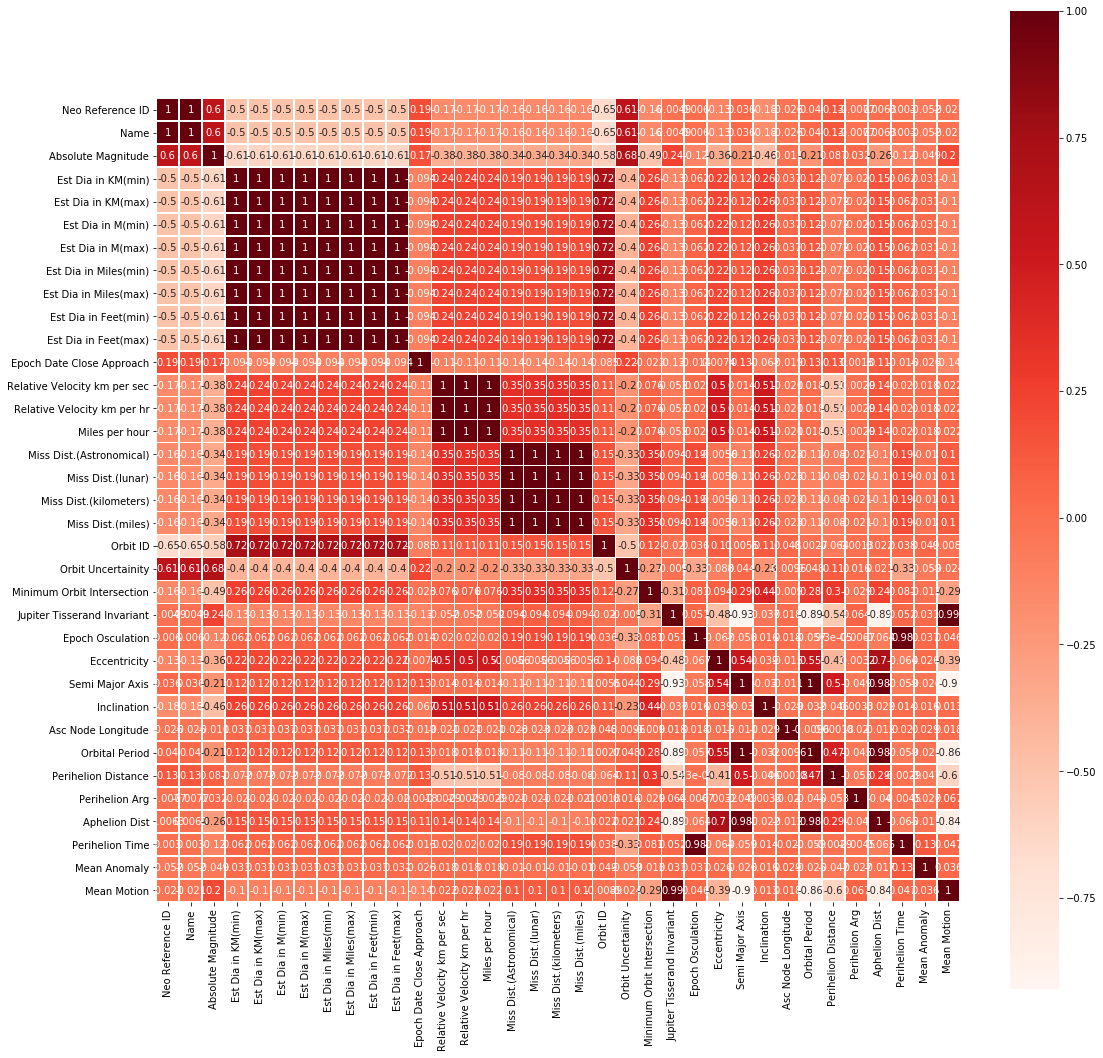

In [5]:
cor = X_.corr()

plt.figure(figsize=(18,18))
heatmap = sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, square=True, linewidths=.5)
bottom, top = heatmap.get_ylim()
heatmap.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [6]:
X_.shape

(4687, 39)

In [7]:
X_.columns

Index(['Neo Reference ID', 'Name', 'Absolute Magnitude', 'Est Dia in KM(min)',
       'Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)',
       'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
       'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Close Approach Date',
       'Epoch Date Close Approach', 'Relative Velocity km per sec',
       'Relative Velocity km per hr', 'Miles per hour',
       'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbiting Body',
       'Orbit ID', 'Orbit Determination Date', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
       'Mean Motion', 'Equinox'],
      dtype='object')

### 1.2 Feature selection

Drop the highly correlated features. Drop the non-numeric features. Drop the features with one single common value.

In [8]:
selected_features = ['Neo Reference ID', 'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Epoch Date Close Approach', 
                     'Miles per hour', 'Miss Dist.(Astronomical)', 'Orbit ID', 'Orbit Uncertainity', 
                     'Minimum Orbit Intersection', 
                     'Jupiter Tisserand Invariant', 'Epoch Osculation', 'Eccentricity', 'Inclination', 
                     'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance', 'Perihelion Arg', 
                     'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly', 'Mean Motion']

In [9]:
X = X_[selected_features]

Convert the Boolean label to (+1)/(-1). 

In [10]:
y = y_
y[y_==True] = 1
y[y_==False] = -1

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


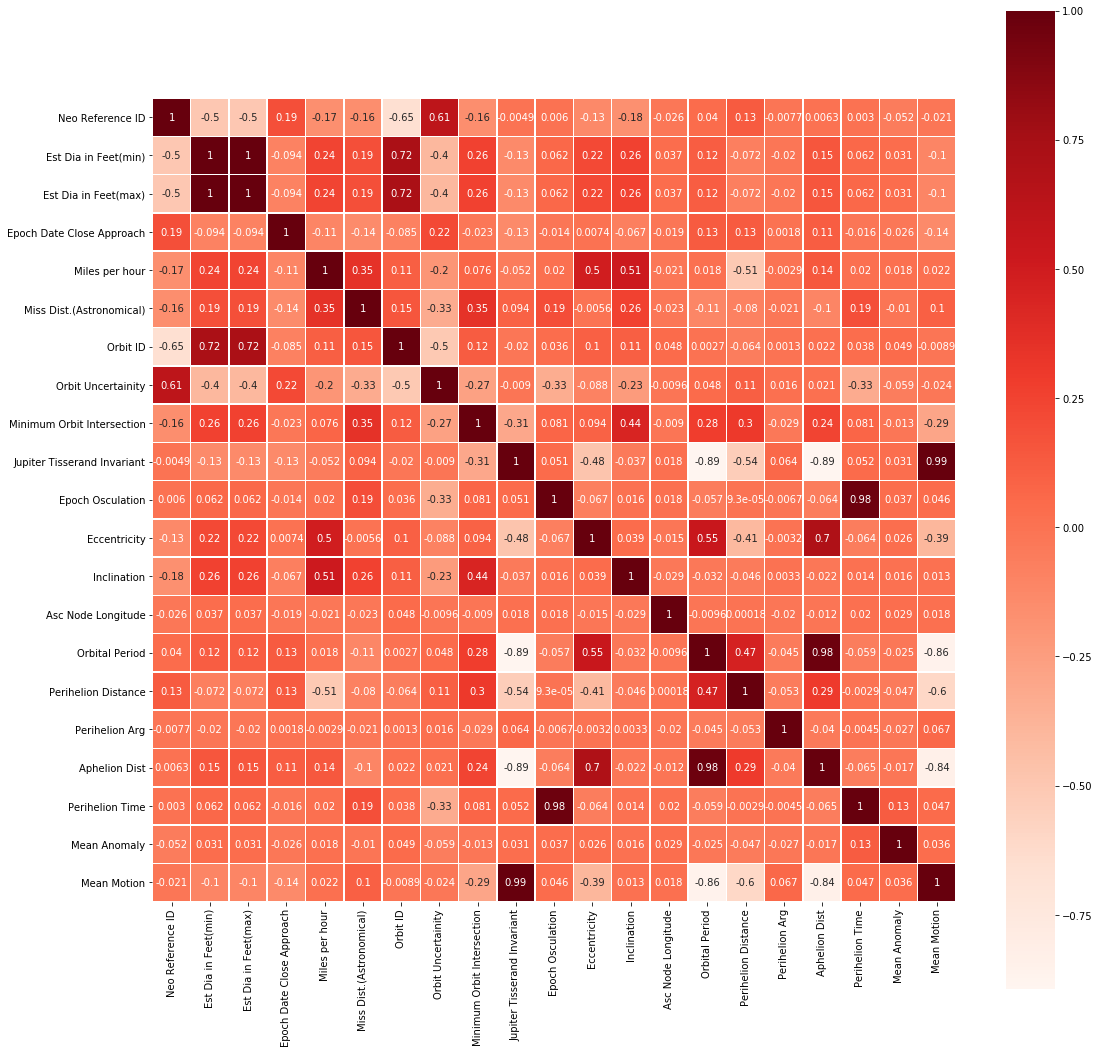

In [13]:
cor = X.corr()

plt.figure(figsize=(18,18))
heatmap = sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, square=True, linewidths=.5)
bottom, top = heatmap.get_ylim()
heatmap.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [14]:
X.shape

(4687, 21)

### 1.3 normalization

In [15]:
# X_ = (X-np.min(X))/(np.max(X) - np.min(X))
X = np.asarray(X)
X_ = np.zeros(X.shape)
for j in range(X.shape[1]):
    X_[:,j] = X[:,j]/np.linalg.norm(X[:,j])
X_

array([[0.01630215, 0.00439934, 0.00439934, ..., 0.01460929, 0.01836362,
        0.01059888],
       [0.01639405, 0.00505112, 0.00505112, ..., 0.01460711, 0.01204707,
        0.0151715 ],
       [0.01077188, 0.00800549, 0.00800549, ..., 0.01460904, 0.02030901,
        0.01003927],
       ...,
       [0.01655148, 0.00265087, 0.00265087, ..., 0.01461011, 0.0141106 ,
        0.00936314],
       [0.0165515 , 0.00401225, 0.00401225, ..., 0.01461004, 0.01411225,
        0.00975922],
       [0.01660987, 0.0138544 , 0.0138544 , ..., 0.01461022, 0.0128153 ,
        0.00988417]])

In [16]:
np.mean(X_, axis=0)

array([0.01440571, 0.00707534, 0.00707534, 0.01440502, 0.01294883,
       0.01270233, 0.00868115, 0.01099169, 0.0098411 , 0.01418782,
       0.01460671, 0.01321121, 0.01130795, 0.01252607, 0.0126156 ,
       0.01400005, 0.01272967, 0.01317452, 0.01460671, 0.01256204,
       0.01324955])

### 1.4 split the training set and the testing set

In [17]:
X_train = np.asarray(X_)[:int(0.7*len(X_)), :]
y_train = np.asarray(y)[:int(0.7*len(X_))]
y_train = y_train.reshape((y_train.shape[0],1))

X_test = np.asarray(X_)[int(0.7*len(X_)):, :]
y_test = np.asarray(y)[int(0.7*len(X_)):]
y_test = y_test.reshape((y_test.shape[0],1))

In [18]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3280, 21)
(1407, 21)
(3280, 1)
(1407, 1)


In [27]:
classes = ['Hazardous', 'Non-hazardous']

In [28]:
# function to plot the confusion matrix
def plot_CM(y_true, y_pred):
    plt.figure(figsize=(6,4))
    cm = confusion_matrix(y_true, y_pred)
    df_cm = pd.DataFrame(cm, index=classes, columns=classes)
    hmap = sns.heatmap(df_cm, annot=True, fmt="d")
    hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
    hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=0, ha='center')
    bottom, top = hmap.get_ylim()
    hmap.set_ylim(bottom + 0.5, top - 0.5)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

## 2 Linear Regression Algorithm design

### 2.1 Linear regression

#### 2.1.1 Least-Squares

In [20]:
w = np.linalg.inv(X_train.T@X_train)@X_train.T@y_train
w

array([[-8.42462835e+00],
       [-5.23613031e+07],
       [ 5.23612940e+07],
       [-4.66607954e+00],
       [ 2.69741150e+00],
       [ 4.41836402e+00],
       [ 8.42831590e+00],
       [-2.53952733e+01],
       [-3.70322535e+01],
       [ 7.90022958e+01],
       [ 2.33314016e+04],
       [ 3.19393090e+01],
       [ 1.25057825e+01],
       [ 1.72352514e+00],
       [-1.16991957e+01],
       [ 2.52287913e+01],
       [-6.72261469e-01],
       [ 1.36499005e+01],
       [-2.34359006e+04],
       [ 4.90537923e+00],
       [-4.25996943e+01]])

In [21]:
y_hat_train = np.sign(X_train@w)

In [22]:
er_num_train = np.sum(y_hat_train!=y_train)
err_train = er_num_train/y_train.shape[0]
acc_train = 1 - err_train
print("Training accuracy: " + str(np.round(acc_train*100,2)) + "%")

Training accuracy: 86.46%


In [23]:
y_hat_test = np.sign(X_test@w)

In [24]:
er_num_test = np.sum(y_hat_test!=y_test)
err_test = er_num_test/y_test.shape[0]
acc_test = 1 - err_test
print("Testing accuracy: " + str(np.round(acc_test*100,2)) + "%")

Testing accuracy: 90.33%


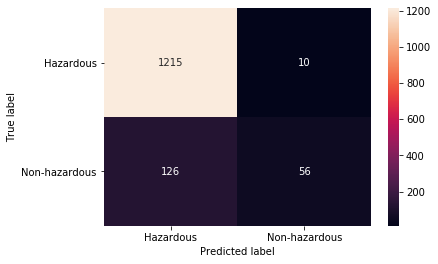

In [29]:
plot_CM(y_test, y_hat_test)

#### 2.1.2 Least-Squares with SVD

In [30]:
U,s,VT = np.linalg.svd(X_train,full_matrices=False)

In [31]:
w = VT.T@np.diag(1/(s**2))@U.T@y_train

In [32]:
y_hat_train = np.sign(X_train@w)

In [33]:
er_num_train = np.sum(y_hat_train!=y_train)
err_train = er_num_train/y_train.shape[0]
acc_train = 1 - err_train
print("Training accuracy: " + str(np.round(acc_train*100,2)) + "%")

Training accuracy: 48.87%


In [34]:
y_hat_test = np.sign(X_test@w)

In [35]:
er_num_test = np.sum(y_hat_test!=y_test)
err_test = er_num_test/y_test.shape[0]
acc_test = 1 - err_test
print("Testing accuracy: " + str(np.round(acc_test*100,2)) + "%")

Testing accuracy: 48.19%


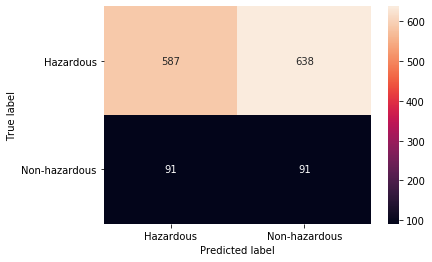

In [36]:
plot_CM(y_test, y_hat_test)

### 2.2 Ridge regression

$\min ||Xw -y||_2^2 + \lambda||w||_2^2$

#### 2.2.1 Ridge regression with least-squares

k-fold cross-validation is applied.

In [37]:
k_fold = 10
id_train = [[]] * k_fold
id_val = [[]] * k_fold
n_train = X_train.shape[0]
for m in range(k_fold):
    id_val[m] = range(m, n_train, k_fold) # Indices of k_fold validation sets.
    id_train[m] = np.setdiff1d(range(n_train), id_val[m])

In [57]:
Lambda = np.logspace(-2, 2, base=10, num=50)

Acc = []
Bias = []
Variance = []
Loss = []
loss_opt = 10**6
acc_opt = 0
lam_opt = None
lam_opt2 = None
w_opt = None

for lam in Lambda:
    bias_mean = []
    var_mean = []
    loss_mean = []
    acc_mean = []
    for m in range(k_fold):
        X_train_cur = X_train[id_train[m]]
        y_train_cur = y_train[id_train[m]]
        X_val_cur = X_train[id_val[m]]
        y_val_cur = y_train[id_val[m]]
        
        w_cur = np.linalg.inv(X_train_cur.T@X_train_cur + lam*np.eye(X_train_cur.shape[1]))@X_train_cur.T@y_train_cur
    
        y_hat_val = np.sign(X_val_cur@w_cur)
        bias_cur = np.linalg.norm(X_val_cur@w_cur-y_val_cur, 2)**2
        var_cur = np.linalg.norm(w_cur, 2)**2
    
        loss_cur = np.linalg.norm(X_val_cur@w_cur-y_val_cur, 2)**2 + np.linalg.norm(w_cur, 2)**2
        
        bias_mean.append(bias_cur)
        var_mean.append(var_cur)
        loss_mean.append(loss_cur)
        
        er_num = np.sum(np.sign(y_hat_val) != y_val_cur)
        err = er_num/y_hat_val.shape[0]
        acc_cur = 1 - err
        
        acc_mean.append(acc_cur)

    bias = np.mean(bias_mean)
    var = np.mean(var_mean)
    loss = np.mean(loss_mean)
    acc = np.mean(acc_mean)
    
    if loss < loss_opt:
        loss_opt = loss
        lam_opt = lam
        acc_opt = acc
        w_opt = w_cur
        
    Bias.append(bias)
    Variance.append(var)
    Loss.append(loss)
    Acc.append(acc)
    print("lambda = " + str(lam) + ", loss: " + str(np.round(loss,2)) + ", bias: " + str(np.round(bias,2)) \
          + ", variance: " + str(np.round(var,2)) + ", accuracy: ", acc)

print("\nOptimal lam: " + str(lam_opt) +". Optimal loss:" + str(np.round(loss_opt,2)) + ". Testing accuracy: " + str(np.round(acc, 4)))

lambda = 0.01, loss: 2516.92, bias: 130.94, variance: 2385.98, accuracy:  0.8585365853658535
lambda = 0.012067926406393288, loss: 2445.21, bias: 130.97, variance: 2314.24, accuracy:  0.8564024390243901
lambda = 0.014563484775012436, loss: 2370.13, bias: 131.03, variance: 2239.1, accuracy:  0.8564024390243903
lambda = 0.017575106248547922, loss: 2290.8, bias: 131.12, variance: 2159.68, accuracy:  0.8551829268292682
lambda = 0.021209508879201904, loss: 2206.45, bias: 131.25, variance: 2075.2, accuracy:  0.8548780487804878
lambda = 0.025595479226995357, loss: 2116.52, bias: 131.43, variance: 1985.09, accuracy:  0.8521341463414634
lambda = 0.030888435964774818, loss: 2020.64, bias: 131.68, variance: 1888.96, accuracy:  0.8515243902439025
lambda = 0.0372759372031494, loss: 1918.7, bias: 132.01, variance: 1786.69, accuracy:  0.850609756097561
lambda = 0.04498432668969444, loss: 1810.9, bias: 132.47, variance: 1678.44, accuracy:  0.8463414634146341
lambda = 0.054286754393238594, loss: 1697.8,

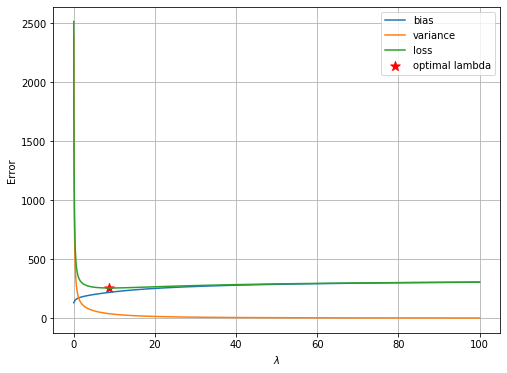

In [58]:
plt.figure(figsize=(8,6))
plt.plot(Lambda, Bias, label='bias')
plt.plot(Lambda, Variance, label='variance')
plt.plot(Lambda, Loss, label='loss')
plt.scatter(lam_opt, loss_opt, marker='*', color='red',s=100, label='optimal lambda')
plt.legend()
plt.ylabel("Error")
plt.xlabel("$\lambda$")
plt.grid()
plt.show()

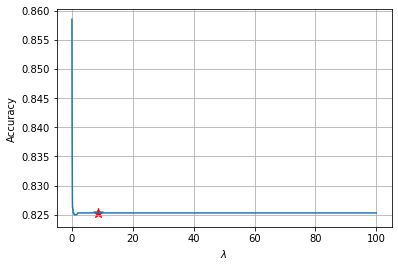

In [59]:
plt.figure()
plt.plot(Lambda, Acc, label='accuracy')
plt.ylabel("Accuracy")
plt.xlabel("$\lambda$")
plt.scatter(lam_opt, acc_opt, marker='*', color='red',s=100, label='optimal lambda')
plt.grid()
plt.show()

In [60]:
y_hat_test = np.sign(X_test@w_opt)

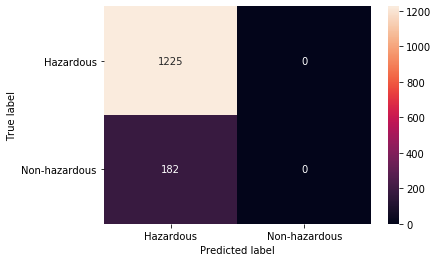

In [65]:
plot_CM(y_test, y_hat_test)

#### 2.2.2 Ridge regression with least-squares and SVD

k-fold cross-validation is applied.

In [61]:
k_fold = 10
id_train = [[]] * k_fold
id_val = [[]] * k_fold
n_train = X_train.shape[0]
for m in range(k_fold):
    id_val[m] = range(m, n_train, k_fold) # Indices of k_fold validation sets.
    id_train[m] = np.setdiff1d(range(n_train), id_val[m])

In [66]:
Lambda = np.logspace(-1, 1, base=10, num=50)

Acc = []
Bias = []
Variance = []
Loss = []
loss_opt = 10**6
acc_opt = 0
lam_opt = None
w_opt = None

for lam in Lambda:
    bias_mean = []
    var_mean = []
    loss_mean = []
    acc_mean = []
    for m in range(k_fold):
        X_train_cur = X_train[id_train[m]]
        y_train_cur = y_train[id_train[m]]
        X_val_cur = X_train[id_val[m]]
        y_val_cur = y_train[id_val[m]]
        
        U,s,VT = np.linalg.svd(X_train_cur,full_matrices=False)
#         w_cur = np.linalg.inv(X_train_cur.T@X_train_cur + lam*np.eye(X_train_cur.shape[1]))@X_train_cur.T@y_train_cur
        w_cur = VT.T@np.linalg.inv(np.diag(s**2) + lam*np.eye(len(s)))@U.T@y_train_cur
    
        y_hat_val = np.sign(X_val_cur@w_cur)
        bias_cur = np.linalg.norm(X_val_cur@w_cur-y_val_cur, 2)**2
        var_cur = np.linalg.norm(w_cur, 2)**2
    
        loss_cur = np.linalg.norm(X_val_cur@w_cur-y_val_cur, 2)**2 + np.linalg.norm(w_cur, 2)**2
        
        bias_mean.append(bias_cur)
        var_mean.append(var_cur)
        loss_mean.append(loss_cur)
        
        er_num = np.sum(np.sign(y_hat_val) != y_val_cur)
        err = er_num/y_hat_val.shape[0]
        acc_cur = 1 - err
        
        acc_mean.append(acc_cur)

    bias = np.mean(bias_mean)
    var = np.mean(var_mean)
    loss = np.mean(loss_mean)
    acc = np.mean(acc_mean)
    
    if loss < loss_opt:
        loss_opt = loss
        lam_opt = lam
        acc_opt = acc
        w_opt = w_cur
        
    Bias.append(bias)
    Variance.append(var)
    Loss.append(loss)
    Acc.append(acc)
    print("lambda = " + str(lam) + ", loss: " + str(np.round(loss,2)) + ", bias: " + str(np.round(bias,2)) \
          + ", variance: " + str(np.round(var,2)) + ", accuracy: ", acc)

print("\nOptimal lam: " + str(lam_opt) +". Optimal loss:" + str(np.round(loss_opt,2)) + ". Testing accuracy: " + str(np.round(acc, 4)))

lambda = 0.1, loss: 6103.94, bias: 206.95, variance: 5896.99, accuracy:  0.7914634146341464
lambda = 0.10985411419875583, loss: 5623.09, bias: 204.55, variance: 5418.54, accuracy:  0.7948170731707317
lambda = 0.12067926406393285, loss: 5172.56, bias: 202.38, variance: 4970.17, accuracy:  0.7960365853658538
lambda = 0.13257113655901093, loss: 4750.23, bias: 200.47, variance: 4549.76, accuracy:  0.7990853658536585
lambda = 0.14563484775012436, loss: 4354.45, bias: 198.83, variance: 4155.63, accuracy:  0.8021341463414634
lambda = 0.15998587196060582, loss: 3983.89, bias: 197.47, variance: 3786.42, accuracy:  0.8042682926829269
lambda = 0.1757510624854792, loss: 3637.44, bias: 196.41, variance: 3441.03, accuracy:  0.8073170731707316
lambda = 0.193069772888325, loss: 3314.2, bias: 195.64, variance: 3118.56, accuracy:  0.8097560975609757
lambda = 0.21209508879201905, loss: 3013.37, bias: 195.18, variance: 2818.19, accuracy:  0.8158536585365853
lambda = 0.2329951810515372, loss: 2734.23, bias

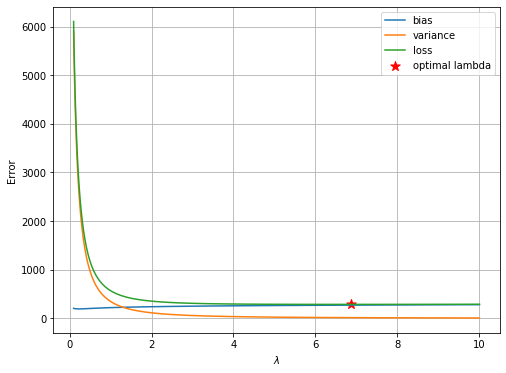

In [67]:
plt.figure(figsize=(8,6))
plt.plot(Lambda, Bias, label='bias')
plt.plot(Lambda, Variance, label='variance')
plt.plot(Lambda, Loss, label='loss')
plt.scatter(lam_opt, loss_opt, marker='*', color='red',s=100, label='optimal lambda')
plt.legend()
plt.ylabel("Error")
plt.xlabel("$\lambda$")
plt.grid()
plt.show()

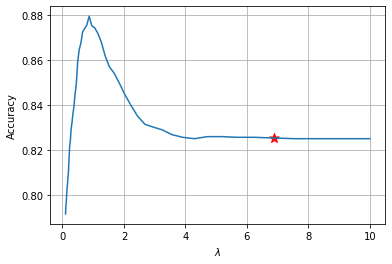

In [68]:
plt.figure()
plt.plot(Lambda, Acc, label='accuracy')
plt.ylabel("Accuracy")
plt.xlabel("$\lambda$")
plt.scatter(lam_opt, acc_opt, marker='*', color='red',s=100, label='optimal lambda')
plt.grid()
plt.show()

In [69]:
y_hat_test = np.sign(X_test@w_opt)

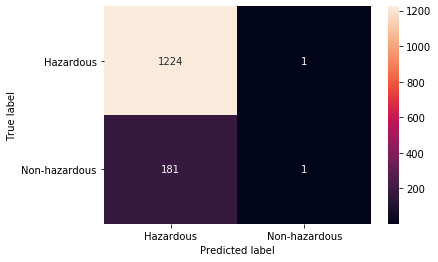

In [70]:
plot_CM(y_test, y_hat_test)

### 2.3 Lasso regression using gradient descent

In [71]:
def ista_solve_hot_lasso(A, d, la_array):
    # ista_solve_hot: Iterative soft-thresholding for multiple values of
    # lambda with hot start for each case - the converged value for the previous
    # value of lambda is used as an initial condition for the current lambda.
    # this function solves the minimization problem
    # Minimize |Ax-d|_2^2 + lambda*|x|_1 (Lasso regression)
    # using iterative soft-thresholding.
    max_iter = 10**4
    tol = 10**(-3)
    tau = 1/np.linalg.norm(A,2)**2
    n = A.shape[1]
    w = np.zeros((n,1))
    num_lam = len(la_array)
    X = np.zeros((n, num_lam))
    for i, each_lambda in enumerate(la_array):
        w = np.zeros((n,1))
        for j in range(max_iter):
            z = w - tau*(A.T@(A@w-d))
            w_old = w
            w = np.sign(z) * np.clip(np.abs(z)-tau*each_lambda/2, 0, np.inf)
            X[:, i:i+1] = w
            if np.linalg.norm(w - w_old) < tol:
                break
    return X

In [72]:
k_fold = 10
id_train = [[]] * k_fold
id_val = [[]] * k_fold
n_train = X_train.shape[0]
for m in range(k_fold):
    id_val[m] = range(m, n_train, k_fold) # Indices of k_fold validation sets.
    id_train[m] = np.setdiff1d(range(n_train), id_val[m])

In [73]:
Lambda = np.logspace(-1, 1, base=10, num=10)

Acc = []
Bias = []
Variance = []
Loss = []
loss_opt = 10**6
acc_opt = 0
lam_opt = None
Er_num = []

bias_mean = []
var_mean = []
loss_mean = []
acc_mean = []

err2_l1 = np.zeros(k_fold)
res2_l1 = np.zeros(k_fold)

for m in range(k_fold):
    X_train_cur = X_train[id_train[m]]
    y_train_cur = y_train[id_train[m]]
    X_val_cur = X_train[id_val[m]]
    y_val_cur = y_train[id_val[m]]
    
    W = ista_solve_hot_lasso(X_train_cur, y_train_cur, Lambda)
#     print(W.shape)
    
    y_hat_val = np.sign(X_val_cur@W)
    
    err_v = np.zeros(len(Lambda))
    for i in range(len(Lambda)):
        err_v[i] = np.mean(y_hat_val!=y_val_cur)
    min_ind = np.argmin(err_v)
    
    err_num = np.sum(np.sign(X_test@W[:, min_ind:min_ind+1])!=y_test)
#     print(W)
    err = err_num/y_test.shape[0]
    acc = 1 - err
    Er_num.append(err_num)
    Acc.append(acc)
    print("Accuracy: " +str(acc) +". Number of misclassification: " +str(err_num))
    

# print()
print("Average error number: ", np.mean(Er_num))
print("Average accuracy: ", np.mean(Acc))

Accuracy: 0.9097370291400142. Number of misclassification: 127
Accuracy: 0.9068941009239517. Number of misclassification: 131
Accuracy: 0.906183368869936. Number of misclassification: 132
Accuracy: 0.9068941009239517. Number of misclassification: 131
Accuracy: 0.9076048329779673. Number of misclassification: 130
Accuracy: 0.9068941009239517. Number of misclassification: 131
Accuracy: 0.9090262970859986. Number of misclassification: 128
Accuracy: 0.906183368869936. Number of misclassification: 132
Accuracy: 0.9047619047619048. Number of misclassification: 134
Accuracy: 0.9040511727078892. Number of misclassification: 135
Average error number:  131.1
Average accuracy:  0.9068230277185503


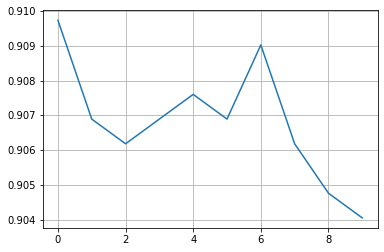

In [74]:
plt.figure()
plt.plot(Acc)
plt.grid()
plt.show()

## 3 SVM Classifier Algorithm design

### 3.1 Hinge loss with gradient descent

$\min_w \sum_{i=1}^N (1 - y_ix_i^Tw)_{+} + \lambda||w||_2^2$

$f(w)|_{w^{(k)}} = \sum_{i=1}^n(-y_ix_i I_{\{y_ix_iw^{(k)}<1\}}) + 2\lambda w^{(k)}$

$w^{(k+1)} = w^{(k)} - \tau \nabla f(w)|_{w^{(k)}}$

In [75]:
def indicator(x):
    if x < 1:
        return 1
    else:
        return 0

In [76]:
X_train.shape

(3280, 21)

In [77]:
w = np.ones((X_train.shape[1], 1))

In [78]:
w

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [79]:
X_train@w

array([[0.24213633],
       [0.28030274],
       [0.22408795],
       ...,
       [0.28342349],
       [0.28807727],
       [0.25839312]])

In [80]:
indi = np.multiply(y_train,X_train@w)
ind = np.where(indi<1, 1, 0)
np.sum(ind)

3280

In [81]:
vw = -np.multiply(np.multiply(y_train,ind),X_train)

In [82]:
vw.shape

(3280, 21)

In [83]:
lam=0.01

In [84]:
grad = np.sum(vw, axis=0).reshape(w.shape) + 2 * lam * w
grad

array([[31.61253999],
       [12.88050959],
       [12.88050959],
       [28.55503412],
       [25.43584113],
       [28.44971823],
       [12.78867381],
       [28.28866184],
       [29.56763195],
       [30.99601135],
       [31.1899533 ],
       [25.32460969],
       [24.76591748],
       [26.60644419],
       [25.7936066 ],
       [31.22115048],
       [27.25290976],
       [26.47974426],
       [31.19001675],
       [26.0001648 ],
       [29.34481477]])

In [85]:
def hinge_loss(A, d, la_array):
    # ista_solve_hot: Iterative soft-thresholding for multiple values of
    # lambda with hot start for each case - the converged value for the previous
    # value of lambda is used as an initial condition for the current lambda.
    # this function solves the minimization problem
    # Minimize |Ax-d|_2^2 + lambda*|x|_1 (Lasso regression)
    # using iterative soft-thresholding.
    max_iter = 10**4
    tol = 10**(-3)
    tau = 1/np.linalg.norm(A,2)**2
    n = A.shape[1]
    w = np.zeros((n,1))
    num_lam = len(la_array)
    X = np.zeros((n, num_lam))
    for i, each_lambda in enumerate(la_array):
#         w = np.zeros((n,1))
        for j in range(max_iter):
            w_old = w
            indi = np.multiply(d, A@w_old)
            ind = np.where(indi<1, 1, 0)
            vw = -np.multiply(np.multiply(d,ind), A)
            grad = np.sum(vw, axis=0).reshape(w_old.shape) + 2 * each_lambda * w_old
            w = w_old - tau * grad
            X[:, i:i+1] = w
            if np.linalg.norm(w - w_old) < tol:
                break
    return X

In [86]:
k_fold = 10
id_train = [[]] * k_fold
id_val = [[]] * k_fold
n_train = X_train.shape[0]
for m in range(k_fold):
    id_val[m] = range(m, n_train, k_fold) # Indices of k_fold validation sets.
    id_train[m] = np.setdiff1d(range(n_train), id_val[m])

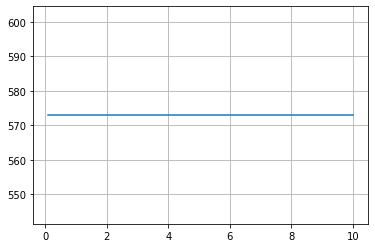

In [87]:
Lambda = np.logspace(-1, 1, base=10, num=10)

Acc = []
Bias = []
Variance = []
Loss = []
loss_opt = 10**6
acc_opt = 0
lam_opt = None
Er_num = []

A = X_train
d = y_train

lam = 1
max_iter = 10**3
tol = 10**(-3)
tau = 1/np.linalg.norm(A,2)**2
tau = 0.1
n = A.shape[1]
w = np.zeros((n,1))

for lam in Lambda:
    for j in range(max_iter):
    #     print(w)
        w_old = w
        indi = np.multiply(d, A@w_old)
        ind = np.where(indi<1, 1, 0)
        vw = -np.multiply(d, A)
        grad = np.sum(np.multiply(vw, ind), axis=0).reshape(w_old.shape) + 2 * lam * w_old
        w = w_old - tau * grad

        err_num = np.sum(np.sign(A@w) != d)
#         print("iteration:", j, "err number:", err_num)
        if np.linalg.norm(w - w_old) < tol:
            break
    Er_num.append(err_num)


plt.figure()
plt.plot(Lambda, Er_num)
plt.grid()
plt.show()
# print("Accuracy: " +str(acc) +". Number of misclassification: " +str(err_num))


# print()
# print("Average error number: ", np.mean(Er_num))
# print("Average accuracy: ", np.mean(Acc))

In [88]:
Lambda = np.logspace(-2, 2, base=10, num=20)

Acc = []
acc_opt = 0
lam_opt = None
Er_num = []

A = X_train
d = y_train

lam = 0.1
max_iter = 10**2
tol = 10**(-2)
tau = 1/np.linalg.norm(A,2)**2

for lam in Lambda:
    w = np.zeros((A.shape[1],1))
    W = np.zeros((w.shape[0], max_iter))

    grad = np.zeros(w.shape)
    Err_num = []

    for j in range(max_iter):
        w_old = w
        for k in range(A.shape[0]):
            xi = A[k:k+1,:]
            di = d[k:k+1,:]
            if di@xi@w_old < 1:
                vi = -(di@xi).T
            else:
                vi = np.zeros(w_old.shape)
            grad += vi

        grad += 2*lam*w_old
        w = w_old - tau * grad
        W[:,j:j+1] = w

        err_num = np.sum(np.sign(X_test@w) != y_test)
        Err_num.append(err_num)

    #     print(np.linalg.norm(w - w_old))
        if np.linalg.norm(w - w_old) < tol:
            break

#     print(Err_num)
    min_ind = np.argmin(Err_num)
#     print(min_ind)
    
    err_num = Err_num[min_ind]
    Er_num.append(err_num)
    acc = 1 - err_num/y_test.shape[0]
    Acc.append(acc)
    print("Lambda =", lam, "Accuracy: " +str(acc) +". Number of misclassification: " +str(err_num))


# print()
# print("Average error number: ", np.mean(Er_num))
# print("Average accuracy: ", np.mean(Acc))

Lambda = 0.01 Accuracy: 0.9232409381663113. Number of misclassification: 108
Lambda = 0.016237767391887217 Accuracy: 0.923951670220327. Number of misclassification: 107
Lambda = 0.026366508987303583 Accuracy: 0.9267945984363894. Number of misclassification: 103
Lambda = 0.04281332398719394 Accuracy: 0.923951670220327. Number of misclassification: 107
Lambda = 0.06951927961775606 Accuracy: 0.9260838663823738. Number of misclassification: 104
Lambda = 0.11288378916846889 Accuracy: 0.9289267945984364. Number of misclassification: 100
Lambda = 0.18329807108324356 Accuracy: 0.9118692253020612. Number of misclassification: 124
Lambda = 0.29763514416313175 Accuracy: 0.9026297085998578. Number of misclassification: 137
Lambda = 0.4832930238571752 Accuracy: 0.898365316275764. Number of misclassification: 143
Lambda = 0.7847599703514611 Accuracy: 0.8742004264392325. Number of misclassification: 177
Lambda = 1.2742749857031335 Accuracy: 0.8869936034115139. Number of misclassification: 159
Lambda 

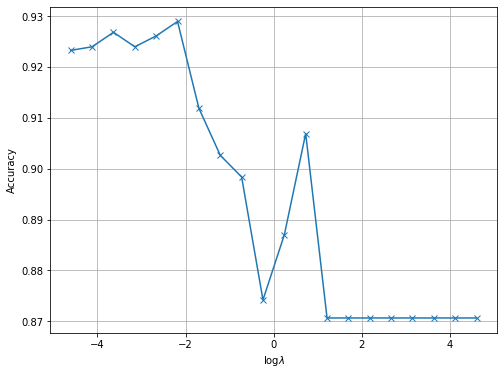

In [89]:
plt.figure(figsize=(8,6))
plt.plot(np.log(Lambda), Acc, '-x')
plt.ylabel("Accuracy")
plt.xlabel("$\log{\lambda}$")
plt.grid()
plt.show()

In [90]:
id = np.argmax(Acc)
print(np.max(Acc))
print(Lambda[id])

0.9289267945984364
0.11288378916846889


### 3.2 Kernel SVM with sk-learn

In [140]:
from sklearn import svm

#### 3.2.1 linear SVC

In [149]:
Lambda = np.logspace(-2, 2, base=10, num=50)

In [153]:
Acc_train = []
Acc_test = []
for lam in Lambda:
    lin_svc = svm.LinearSVC(C=lam,max_iter=20000)
    lin_svc.fit(X_train, y_train.flatten())
    acc_lin_svc_train = lin_svc.score(X_train, y_train)
    acc_lin_svc_test = lin_svc.score(X_test, y_test)
    Acc_train.append(acc_lin_svc_train)
    Acc_test.append(acc_lin_svc_test)
    print("lambda:", np.round(lam,4), ", Training accuracy:", np.round(acc_lin_svc_train,3),
          ", Testing accuracy:", np.round(acc_lin_svc_test,3))

lambda: 0.01 , Training accuracy: 0.825 , Testing accuracy: 0.871
lambda: 0.0121 , Training accuracy: 0.825 , Testing accuracy: 0.871
lambda: 0.0146 , Training accuracy: 0.825 , Testing accuracy: 0.871
lambda: 0.0176 , Training accuracy: 0.825 , Testing accuracy: 0.871
lambda: 0.0212 , Training accuracy: 0.825 , Testing accuracy: 0.871
lambda: 0.0256 , Training accuracy: 0.825 , Testing accuracy: 0.871
lambda: 0.0309 , Training accuracy: 0.825 , Testing accuracy: 0.871
lambda: 0.0373 , Training accuracy: 0.825 , Testing accuracy: 0.871
lambda: 0.045 , Training accuracy: 0.825 , Testing accuracy: 0.871
lambda: 0.0543 , Training accuracy: 0.825 , Testing accuracy: 0.871
lambda: 0.0655 , Training accuracy: 0.825 , Testing accuracy: 0.871
lambda: 0.0791 , Training accuracy: 0.825 , Testing accuracy: 0.871
lambda: 0.0954 , Training accuracy: 0.825 , Testing accuracy: 0.871
lambda: 0.1151 , Training accuracy: 0.825 , Testing accuracy: 0.871
lambda: 0.1389 , Training accuracy: 0.825 , Testing

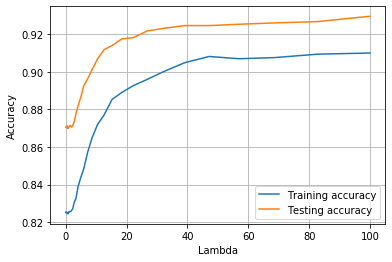

In [154]:
plt.figure()
plt.plot(Lambda, Acc_train, label='Training accuracy')
plt.plot(Lambda, Acc_test, label='Testing accuracy')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Lambda')
plt.grid()
plt.show()

In [155]:
# # y_train_pred = lin_svc.predict(X_train)
# # print("Training Accuracy:", 100 - np.sum(np.abs(y_train - y_train_pred))/len(y_train_pred)*100, "%")
# acc_lin_svc_train = lin_svc.score(X_train, y_train)
# print(acc_lin_svc_train)

In [156]:
# # y_test_pred = lin_svc.predict(X_test)
# # print("Testing Accuracy:", 100 - np.sum(np.abs(y_test - y_test_pred))/len(y_test_pred)*100, "%")
# acc_lin_svc_test = lin_svc.score(X_test, y_test)
# print(acc_lin_svc_train)

#### 3.2.2 SVC kernel=linear

In [158]:
Lambda = np.logspace(-1, 3, base=10, num=50)

In [159]:
Acc_train = []
Acc_test = []
for lam in Lambda:
    linear_svc = svm.SVC(kernel='linear', C=lam)
    linear_svc.fit(X_train, y_train.flatten())
    acc_linear_svc_train = linear_svc.score(X_train, y_train)
    acc_linear_svc_test = linear_svc.score(X_test, y_test)
    Acc_train.append(acc_linear_svc_train)
    Acc_test.append(acc_linear_svc_test)
    print("lambda:", np.round(lam,4), ", Training accuracy:", np.round(acc_linear_svc_train,3),
          ", Testing accuracy:", np.round(acc_linear_svc_test,3))

lambda: 0.1 , Training accuracy: 0.825 , Testing accuracy: 0.871
lambda: 0.1207 , Training accuracy: 0.825 , Testing accuracy: 0.871
lambda: 0.1456 , Training accuracy: 0.825 , Testing accuracy: 0.871
lambda: 0.1758 , Training accuracy: 0.825 , Testing accuracy: 0.871
lambda: 0.2121 , Training accuracy: 0.825 , Testing accuracy: 0.871
lambda: 0.256 , Training accuracy: 0.825 , Testing accuracy: 0.871
lambda: 0.3089 , Training accuracy: 0.825 , Testing accuracy: 0.871
lambda: 0.3728 , Training accuracy: 0.825 , Testing accuracy: 0.871
lambda: 0.4498 , Training accuracy: 0.825 , Testing accuracy: 0.871
lambda: 0.5429 , Training accuracy: 0.825 , Testing accuracy: 0.871
lambda: 0.6551 , Training accuracy: 0.825 , Testing accuracy: 0.871
lambda: 0.7906 , Training accuracy: 0.825 , Testing accuracy: 0.871
lambda: 0.9541 , Training accuracy: 0.825 , Testing accuracy: 0.871
lambda: 1.1514 , Training accuracy: 0.825 , Testing accuracy: 0.871
lambda: 1.3895 , Training accuracy: 0.825 , Testing 

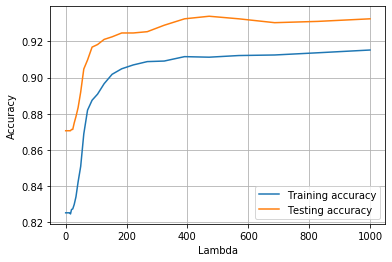

In [160]:
plt.figure()
plt.plot(Lambda, Acc_train, label='Training accuracy')
plt.plot(Lambda, Acc_test, label='Testing accuracy')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Lambda')
plt.grid()
plt.show()

In [122]:
# # y_train_pred = linear_svc.predict(X_train)
# # print("Training Accuracy:", 100 - np.sum(np.abs(y_train - y_train_pred))/len(y_train_pred)*100, "%")
# acc_linear_svc_train = linear_svc.score(X_train, y_train)
# print(acc_linear_svc_train)

In [123]:
# # y_test_pred = linear_svc.predict(X_test)
# # print("Testing Accuracy:", 100 - np.sum(np.abs(y_test - y_test_pred))/len(y_test_pred)*100, "%")
# acc_linear_svc_test = linear_svc.score(X_test, y_test)
# print(acc_linear_svc_test)

#### 3.2.3 SVC kernel=rbf

In [161]:
Lambda = np.logspace(-1, 3, base=10, num=50)

In [162]:
Acc_train = []
Acc_test = []
for lam in Lambda:
    rbf_svc = svm.SVC(kernel='rbf', gamma='scale', C=lam)
    rbf_svc.fit(X_train, y_train.flatten())
    acc_rbf_svc_train = rbf_svc.score(X_train, y_train)
    acc_rbf_svc_test = rbf_svc.score(X_test, y_test)
    Acc_train.append(acc_rbf_svc_train)
    Acc_test.append(acc_rbf_svc_test)
    print("lambda:", np.round(lam,4), ", Training accuracy:", np.round(acc_rbf_svc_train,3),
          ", Testing accuracy:", np.round(acc_rbf_svc_test,3))

lambda: 0.1 , Training accuracy: 0.901 , Testing accuracy: 0.922
lambda: 0.1207 , Training accuracy: 0.908 , Testing accuracy: 0.928
lambda: 0.1456 , Training accuracy: 0.916 , Testing accuracy: 0.93
lambda: 0.1758 , Training accuracy: 0.92 , Testing accuracy: 0.935
lambda: 0.2121 , Training accuracy: 0.927 , Testing accuracy: 0.942
lambda: 0.256 , Training accuracy: 0.934 , Testing accuracy: 0.945
lambda: 0.3089 , Training accuracy: 0.939 , Testing accuracy: 0.946
lambda: 0.3728 , Training accuracy: 0.943 , Testing accuracy: 0.95
lambda: 0.4498 , Training accuracy: 0.947 , Testing accuracy: 0.951
lambda: 0.5429 , Training accuracy: 0.949 , Testing accuracy: 0.955
lambda: 0.6551 , Training accuracy: 0.951 , Testing accuracy: 0.953
lambda: 0.7906 , Training accuracy: 0.953 , Testing accuracy: 0.955
lambda: 0.9541 , Training accuracy: 0.955 , Testing accuracy: 0.955
lambda: 1.1514 , Training accuracy: 0.957 , Testing accuracy: 0.958
lambda: 1.3895 , Training accuracy: 0.96 , Testing accu

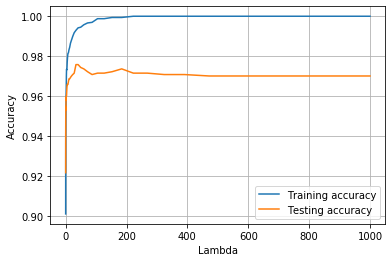

In [163]:
plt.figure()
plt.plot(Lambda, Acc_train, label='Training accuracy')
plt.plot(Lambda, Acc_test, label='Testing accuracy')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Lambda')
plt.grid()
plt.show()

In [164]:
# # y_train_pred = rbf_svc.predict(X_train)
# # print("Training Accuracy:", 100 - np.sum(np.abs(y_train - y_train_pred))/len(y_train_pred)*100, "%")
# acc_rbf_svc_train = rbf_svc.score(X_train, y_train)
# print(acc_rbf_svc_train)

In [165]:
# # y_test_pred = rbf_svc.predict(X_test)
# # print("Testing Accuracy:", 100 - np.sum(np.abs(y_test - y_test_pred))/len(y_test_pred)*100, "%")
# acc_rbf_svc_test = rbf_svc.score(X_test, y_test)
# print(acc_rbf_svc_test)

#### 3.2.4 SVC kernel=poly

In [166]:
Lambda = np.logspace(-1, 3, base=10, num=50)

In [167]:
Acc_train = []
Acc_test = []
for lam in Lambda:
    poly_svc = svm.SVC(kernel='poly', gamma='scale',C=lam, max_iter=-1)
    poly_svc.fit(X_train, y_train.flatten())
    acc_poly_svc_train = poly_svc.score(X_train, y_train)
    acc_poly_svc_test = poly_svc.score(X_test, y_test)
    Acc_train.append(acc_poly_svc_train)
    Acc_test.append(acc_poly_svc_test)
    print("lambda:", np.round(lam,4), ", Training accuracy:", np.round(acc_poly_svc_train,3),
          ", Testing accuracy:", np.round(acc_poly_svc_test,3))

lambda: 0.1 , Training accuracy: 0.953 , Testing accuracy: 0.95
lambda: 0.1207 , Training accuracy: 0.954 , Testing accuracy: 0.95
lambda: 0.1456 , Training accuracy: 0.954 , Testing accuracy: 0.952
lambda: 0.1758 , Training accuracy: 0.957 , Testing accuracy: 0.955
lambda: 0.2121 , Training accuracy: 0.958 , Testing accuracy: 0.955
lambda: 0.256 , Training accuracy: 0.96 , Testing accuracy: 0.957
lambda: 0.3089 , Training accuracy: 0.961 , Testing accuracy: 0.955
lambda: 0.3728 , Training accuracy: 0.963 , Testing accuracy: 0.958
lambda: 0.4498 , Training accuracy: 0.965 , Testing accuracy: 0.959
lambda: 0.5429 , Training accuracy: 0.967 , Testing accuracy: 0.959
lambda: 0.6551 , Training accuracy: 0.968 , Testing accuracy: 0.96
lambda: 0.7906 , Training accuracy: 0.97 , Testing accuracy: 0.963
lambda: 0.9541 , Training accuracy: 0.97 , Testing accuracy: 0.964
lambda: 1.1514 , Training accuracy: 0.973 , Testing accuracy: 0.964
lambda: 1.3895 , Training accuracy: 0.974 , Testing accura

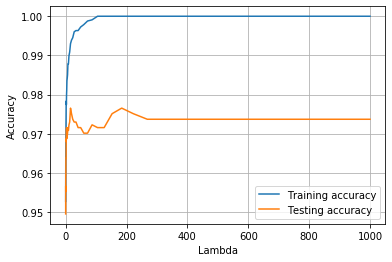

In [168]:
plt.figure()
plt.plot(Lambda, Acc_train, label='Training accuracy')
plt.plot(Lambda, Acc_test, label='Testing accuracy')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Lambda')
plt.grid()
plt.show()

In [133]:
# # y_train_pred = poly_svc.predict(X_train)
# # print("Training Accuracy:", 100 - np.sum(np.abs(y_train - y_train_pred))/len(y_train_pred)*100, "%")
# acc_poly_svc_train = poly_svc.score(X_train, y_train)
# print(acc_poly_svc_train)

In [134]:
# # y_test_pred = poly_svc.predict(X_test)
# # print("Testing Accuracy:", 100 - np.sum(np.abs(y_test - y_atest_pred))/len(y_test_pred)*100, "%")
# acc_poly_svc_test = poly_svc.score(X_test, y_test)
# print(acc_poly_svc_test)

#### 3.2.5 SVC kernel=sigmoid

In [169]:
Lambda = np.logspace(-1, 3, base=10, num=50)

In [170]:
Acc_train = []
Acc_test = []
for lam in Lambda:
    sigmoid_svc = svm.SVC(kernel='sigmoid', gamma='scale', C=lam)
    sigmoid_svc.fit(X_train, y_train.flatten())
    acc_sigmoid_svc_train = sigmoid_svc.score(X_train, y_train)
    acc_sigmoid_svc_test = sigmoid_svc.score(X_test, y_test)
    Acc_train.append(acc_sigmoid_svc_train)
    Acc_test.append(acc_sigmoid_svc_test)
    print("lambda:", np.round(lam,4), ", Training accuracy:", np.round(acc_sigmoid_svc_train,3),
          ", Testing accuracy:", np.round(acc_sigmoid_svc_test,3))

lambda: 0.1 , Training accuracy: 0.825 , Testing accuracy: 0.871
lambda: 0.1207 , Training accuracy: 0.825 , Testing accuracy: 0.871
lambda: 0.1456 , Training accuracy: 0.825 , Testing accuracy: 0.871
lambda: 0.1758 , Training accuracy: 0.825 , Testing accuracy: 0.871
lambda: 0.2121 , Training accuracy: 0.824 , Testing accuracy: 0.871
lambda: 0.256 , Training accuracy: 0.817 , Testing accuracy: 0.868
lambda: 0.3089 , Training accuracy: 0.81 , Testing accuracy: 0.861
lambda: 0.3728 , Training accuracy: 0.803 , Testing accuracy: 0.859
lambda: 0.4498 , Training accuracy: 0.798 , Testing accuracy: 0.854
lambda: 0.5429 , Training accuracy: 0.793 , Testing accuracy: 0.846
lambda: 0.6551 , Training accuracy: 0.789 , Testing accuracy: 0.844
lambda: 0.7906 , Training accuracy: 0.782 , Testing accuracy: 0.839
lambda: 0.9541 , Training accuracy: 0.776 , Testing accuracy: 0.833
lambda: 1.1514 , Training accuracy: 0.819 , Testing accuracy: 0.875
lambda: 1.3895 , Training accuracy: 0.819 , Testing a

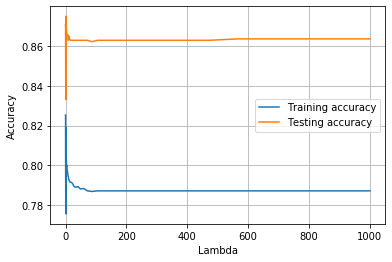

In [171]:
plt.figure()
plt.plot(Lambda, Acc_train, label='Training accuracy')
plt.plot(Lambda, Acc_test, label='Testing accuracy')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Lambda')
plt.grid()
plt.show()

In [172]:
# # y_train_pred = sigmoid_svc.predict(X_train)
# # print("Training Accuracy:", 100 - np.sum(np.abs(y_train - y_train_pred))/len(y_train_pred)*100, "%")
# acc_sigmoid_svc_train = sigmoid_svc.score(X_train, y_train)
# print(acc_sigmoid_svc_train)

In [173]:
# # y_test_pred = sigmoid_svc.predict(X_test)
# # print("Testing Accuracy:", 100 - np.sum(np.abs(y_test - y_test_pred))/len(y_test_pred)*100, "%")
# acc_sigmoid_svc_test = sigmoid_svc.score(X_test, y_test)
# print(acc_sigmoid_svc_test)

#### chosen kernel: rbf

In [174]:
Lambda = np.logspace(-1, 3, base=10, num=50)

In [175]:
Acc_train = []
Acc_test = []
for lam in Lambda:
    rbf_svc = svm.SVC(kernel='rbf', gamma='scale', C=lam)
    rbf_svc.fit(X_train, y_train.flatten())
    acc_rbf_svc_train = rbf_svc.score(X_train, y_train)
    acc_rbf_svc_test = rbf_svc.score(X_test, y_test)
    Acc_train.append(acc_rbf_svc_train)
    Acc_test.append(acc_rbf_svc_test)
    print("lambda:", np.round(lam,4), ", Training accuracy:", np.round(acc_rbf_svc_train,3),
          ", Testing accuracy:", np.round(acc_rbf_svc_test,3))

lambda: 0.1 , Training accuracy: 0.901 , Testing accuracy: 0.922
lambda: 0.1207 , Training accuracy: 0.908 , Testing accuracy: 0.928
lambda: 0.1456 , Training accuracy: 0.916 , Testing accuracy: 0.93
lambda: 0.1758 , Training accuracy: 0.92 , Testing accuracy: 0.935
lambda: 0.2121 , Training accuracy: 0.927 , Testing accuracy: 0.942
lambda: 0.256 , Training accuracy: 0.934 , Testing accuracy: 0.945
lambda: 0.3089 , Training accuracy: 0.939 , Testing accuracy: 0.946
lambda: 0.3728 , Training accuracy: 0.943 , Testing accuracy: 0.95
lambda: 0.4498 , Training accuracy: 0.947 , Testing accuracy: 0.951
lambda: 0.5429 , Training accuracy: 0.949 , Testing accuracy: 0.955
lambda: 0.6551 , Training accuracy: 0.951 , Testing accuracy: 0.953
lambda: 0.7906 , Training accuracy: 0.953 , Testing accuracy: 0.955
lambda: 0.9541 , Training accuracy: 0.955 , Testing accuracy: 0.955
lambda: 1.1514 , Training accuracy: 0.957 , Testing accuracy: 0.958
lambda: 1.3895 , Training accuracy: 0.96 , Testing accu

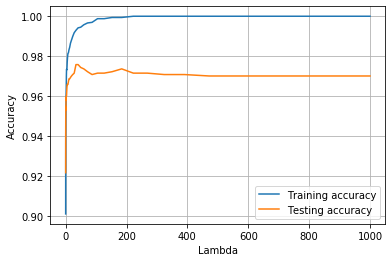

In [176]:
plt.figure()
plt.plot(Lambda, Acc_train, label='Training accuracy')
plt.plot(Lambda, Acc_test, label='Testing accuracy')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Lambda')
plt.grid()
plt.show()

## 4 Neural networks

### 4.1 Backpropagation neural network with SGD

Network architecture:

* input layer size: $m = 21$
* hidden layer size: $p = 50$
* output layer size: $o = 1$

#### forward

$z_k = \sum_{j=1}^m w_{kj} x_j$, $h_k = \sigma(z_k) = \sigma(\sum_{j=1}^m w_{kj} x_j)$

$d = \sum_{k=1}^p v_{k} h_k$, $\hat{y} = \sigma(d) = \sigma(\sum_{k=1}^p v_{k} h_k)$

#### backpropagation

loss: $f = \sum_{i=1}^N \frac{1}{2}(\hat{y}^i - y^i)^2$

$\hat{y}^i = \sigma(d^i) = \sigma(\sum_{k=1}^P v_{k} h_k^i )$

$\begin{align}
\frac{\partial f^i}{\partial v_k} 
&= \frac{\partial f^i}{\partial \hat{y}^i} \frac{\partial \hat{y}^i}{\partial d^i} \frac{\partial d^i}{\partial v_k^i}
\end{align}$

$\begin{align}
\frac{\partial f^i}{\partial w_{kj}^i}
&= \frac{\partial f^i}{\partial \hat{y}^i} \frac{\partial \hat{y}^i}{\partial d^i} \frac{\partial d^i}{\partial h_k^i} \frac{\partial h_k^i}{\partial z_{k}^i} \frac{\partial z_{k}^i}{\partial w_{kj}^i}
\end{align}$

$\begin{align}\frac{\partial f^i}{\partial \hat{y}^i} 
&= \frac{\partial \frac{1}{2}(\hat{y}^i - y^i)^2}{\partial \hat{y}^i} \\
&= (\hat{y}^i - y^i)
\end{align}$

$\begin{align}\frac{\partial y^i}{\partial d^i}
&= \frac{\partial \sigma(d^i)}{\partial d^i} \\
&= \sigma(d^i) (1 - \sigma(d^i)) \\
&= \hat{y}^i (1 - \hat{y}^i)
\end{align}$

$\begin{align}\frac{\partial d^i}{\partial v_k^i}
&= \frac{\partial \sum_{k=1}^P v_{k}^i h_k^i}{\partial v_k^i} \\
&= h_k^i
\end{align}$

$\begin{align}\frac{\partial d^i}{\partial h_k^i}
&= \frac{\partial \sum_{k=1}^P v_{k}^i h_k^i}{\partial h_k^i} \\
&= v_{k}^i
\end{align}$

$\begin{align}\frac{\partial h_k^i}{\partial z_k^i}
&= \frac{\partial \sigma(z_k^i)}{\partial z_k^i} \\
&= \sigma(z_k^i)(1-\sigma(z_k^i)) \\
&= h_k^i (1 - h_k^i)
\end{align}$

$\begin{align}\frac{\partial z_k^i}{\partial w_{kj}^i}
&= \frac{\partial \sum_{j=1}^m w_{kj^i} x_j^i}{\partial w_{kj}^i} \\
&= x_j^i
\end{align}$

So,

$\begin{align}
\frac{\partial f^i}{\partial v_k} 
&= \frac{\partial f^i}{\partial \hat{y}^i} \frac{\partial \hat{y}^i}{\partial d^i} \frac{\partial d^i}{\partial v_k^i} \\
&= (\hat{y}^i - y^i) \hat{y}^i (1 - \hat{y}^i) h_k^i
\end{align}$

$\begin{align}
\frac{\partial f^i}{\partial w_{kj}^i}
&= \frac{\partial f^i}{\partial \hat{y}^i} \frac{\partial \hat{y}^i}{\partial d^i} \frac{\partial d^i}{\partial h_k^i} \frac{\partial h_k^i}{\partial z_{k}^i} \frac{\partial z_{k}^i}{\partial w_{kj}^i} \\
&= (\hat{y}^i - y^i) \hat{y}^i (1 - \hat{y}^i) v_{k}^i h_k^i (1 - h_k^i) x_j^i
\end{align}$

In [177]:
y_train_ = np.sign(y_train)/2+.5
p = X_train.shape[1] #features
n = X_train.shape[0] #examples

## Train NN
Xb = np.hstack((np.ones((n,1)), X_train))
M = 50 #number of hidden nodes

## initial weights
V = np.random.randn(M+1, 1); 
W = np.random.randn(p+1, M);

alpha = 0.5 #step size
L = 1000 #number of epochs

def sigmoid(_x):
    return 1/(1+np.exp(-_x))

Acc = []
W_list = []
V_list = []

for epoch in range(L):
    ind = np.random.permutation(n)
    for i in ind:
        # Forward-propagate
        H = sigmoid(np.hstack((np.ones((1,1)), Xb[[i],:]@W)))
        Yhat = sigmoid(H@V)

         # Backpropagate
        delta = (Yhat - y_train_[[i],:]) * Yhat * (1 - Yhat)
        Vnew = V - alpha * H.T@delta
        gamma = delta@V[1:,:].T * H[:,1:] * (1 - H[:,1:])
        Wnew = W - alpha* Xb[[i],:].T@gamma
        V = Vnew
        W = Wnew
        
    H = sigmoid(np.hstack((np.ones((n,1)), Xb@W)))
    Yhat = sigmoid(H@V)
#     print(Yhat)
    err = np.sum(abs(np.round(Yhat)-y_train_))
    acc = 1 - err/n
    if epoch %100 ==0:
        print("Epoch:", epoch, "Accuracy:", acc)
        
    Acc.append(acc)
    W_list.append(W)
    V_list.append(V)

Epoch: 0 Accuracy: 0.8253048780487805
Epoch: 100 Accuracy: 0.8603658536585366
Epoch: 200 Accuracy: 0.9064024390243902
Epoch: 300 Accuracy: 0.9070121951219512
Epoch: 400 Accuracy: 0.8914634146341464
Epoch: 500 Accuracy: 0.9146341463414634
Epoch: 600 Accuracy: 0.8929878048780487
Epoch: 700 Accuracy: 0.8954268292682926
Epoch: 800 Accuracy: 0.9314024390243902
Epoch: 900 Accuracy: 0.9289634146341463


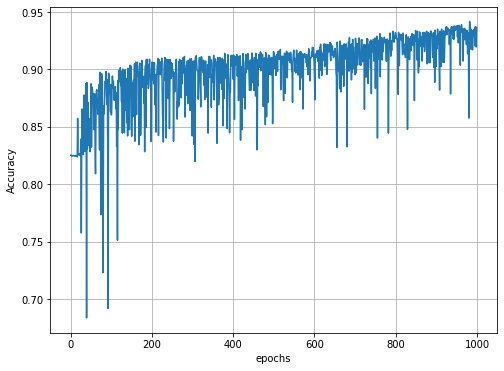

In [178]:
plt.figure(figsize=(8,6))
plt.plot(Acc, '-')
plt.ylabel("Accuracy")
plt.xlabel("epochs")
plt.grid()
plt.show()

In [179]:
id = np.argmax(Acc)
print(np.max(Acc))

0.9417682926829268


In [180]:
W_opt = W_list[id]
V_opt = V_list[id]

In [181]:
Xb_test = np.hstack((np.ones((X_test.shape[0],1)), X_test))
H_test = sigmoid(np.hstack((np.ones((X_test.shape[0],1)), Xb_test@W_opt)))
Yhat_test = sigmoid(H_test@V_opt)
y_pred_test = np.round(Yhat_test)
y_test_ = np.sign(y_test)/2+.5

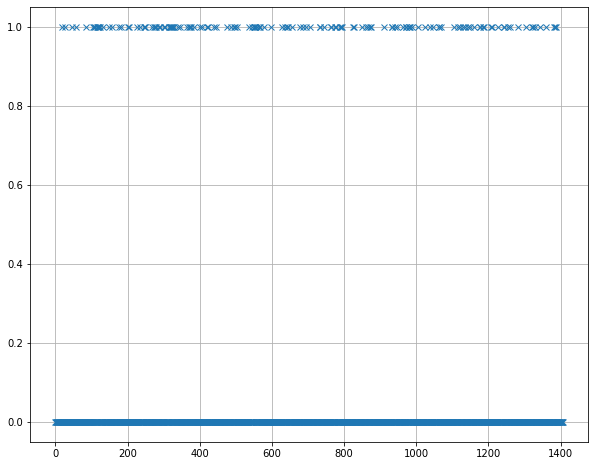

In [182]:
plt.figure(figsize=(10,8))
plt.plot(y_pred_test, 'x')
plt.grid()
plt.show()

In [183]:
err = np.sum(abs(y_pred_test - y_test_))
acc = 1 - err/n
print("Test accuracy:", acc*100, "%")

Test accuracy: 97.89634146341464 %


In [184]:
from sklearn.metrics import confusion_matrix, classification_report
classes = ['Hazardous', 'Non-hazardous']
print(classification_report(y_test_, y_pred_test, target_names=classes))

               precision    recall  f1-score   support

    Hazardous       0.96      0.99      0.97      1225
Non-hazardous       0.90      0.70      0.79       182

     accuracy                           0.95      1407
    macro avg       0.93      0.85      0.88      1407
 weighted avg       0.95      0.95      0.95      1407



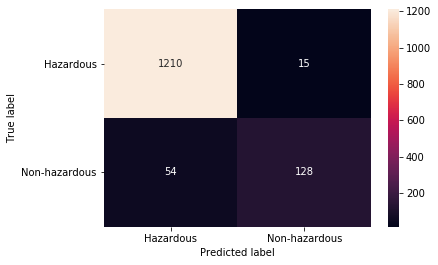

In [185]:
plt.figure(figsize=(6,4))
cm = confusion_matrix(y_test_, y_pred_test)
df_cm = pd.DataFrame(cm, index=classes, columns=classes)
hmap = sns.heatmap(df_cm, annot=True, fmt="d")
hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=0, ha='center')
bottom, top = hmap.get_ylim()
hmap.set_ylim(bottom + 0.5, top - 0.5)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### 4.2 Neural network with Pytorch

In [186]:
import torch
from torch import nn, optim
import torch.nn.functional as F

In [187]:
# y_train[y_==False] = 0
X_train_t = torch.from_numpy(X_train).float()
y_train_t = torch.squeeze(torch.from_numpy(y_train).float())
y_train_t[y_train_t==-1] = 0
X_test_t = torch.from_numpy(X_test).float()
y_test_t = torch.squeeze(torch.from_numpy(y_test).float())
y_test_t[y_test_t==-1] = 0

In [188]:
X_train_t.shape, y_train_t.shape

(torch.Size([3280, 21]), torch.Size([3280]))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


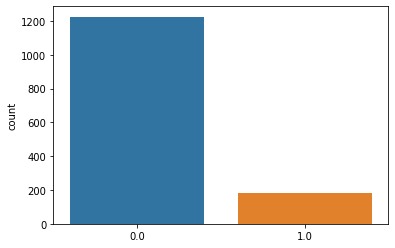

In [189]:
sns.countplot(np.asarray(y_test_t));

In [190]:
n_feature = X_train_t.shape[1]
hidden_size = [128, 32]
output_size = 1

In [191]:
class Net(nn.Module):
    def __init__(self, n_features):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(n_features, hidden_size[0])
        self.fc2 = nn.Linear(hidden_size[0], hidden_size[1])
        self.fc3 = nn.Linear(hidden_size[1], output_size)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return torch.sigmoid(self.fc3(x))
    
net = Net(X_train.shape[1])
criterion = nn.BCELoss()
optimizer = optim.Adam(net.parameters(), lr=0.005)

In [192]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
X_train_t = X_train_t.to(device)
y_train_t = y_train_t.to(device)
X_test_t = X_test_t.to(device)
y_test_t = y_test_t.to(device)
net = net.to(device)
criterion = criterion.to(device)

In [193]:
def calculate_accuracy(y_true, y_pred):
    predicted = y_pred.ge(.5).view(-1)
    return (y_true == predicted).sum().float() / len(y_true)

def round_tensor(t, decimal_places=3):
    return round(t.item(), decimal_places)

In [194]:
Train_loss = []
Test_loss = []
Train_acc = []
Test_acc = []

for epoch in range(1500):
    y_pred = net(X_train_t)
    y_pred = torch.squeeze(y_pred)
    train_loss = criterion(y_pred, y_train_t)
    train_acc = calculate_accuracy(y_train_t, y_pred)
    
    y_test_pred = net(X_test_t)
    y_test_pred = torch.squeeze(y_test_pred)
    test_loss = criterion(y_test_pred, y_test_t)
    test_acc = calculate_accuracy(y_test_t, y_test_pred)

    Train_loss.append(train_loss)
    Test_loss.append(test_loss)
    Train_acc.append(train_acc)
    Test_acc.append(test_acc)
    if epoch % 100 == 0:
        print(
        f'''epoch {epoch} :
        Training set - loss: {round_tensor(train_loss)}, accuracy: {round_tensor(train_acc)}
        Testing set - loss: {round_tensor(test_loss)}, accuracy: {round_tensor(test_acc)}''')
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

epoch 0 :
        Training set - loss: 0.69, accuracy: 0.825
        Testing set - loss: 0.689, accuracy: 0.871
epoch 100 :
        Training set - loss: 0.428, accuracy: 0.825
        Testing set - loss: 0.355, accuracy: 0.871
epoch 200 :
        Training set - loss: 0.221, accuracy: 0.911
        Testing set - loss: 0.171, accuracy: 0.93
epoch 300 :
        Training set - loss: 0.113, accuracy: 0.964
        Testing set - loss: 0.101, accuracy: 0.967
epoch 400 :
        Training set - loss: 0.078, accuracy: 0.973
        Testing set - loss: 0.067, accuracy: 0.977
epoch 500 :
        Training set - loss: 0.056, accuracy: 0.983
        Testing set - loss: 0.045, accuracy: 0.985
epoch 600 :
        Training set - loss: 0.042, accuracy: 0.989
        Testing set - loss: 0.033, accuracy: 0.991
epoch 700 :
        Training set - loss: 0.033, accuracy: 0.993
        Testing set - loss: 0.026, accuracy: 0.993
epoch 800 :
        Training set - loss: 0.027, accuracy: 0.995
        Testing set 

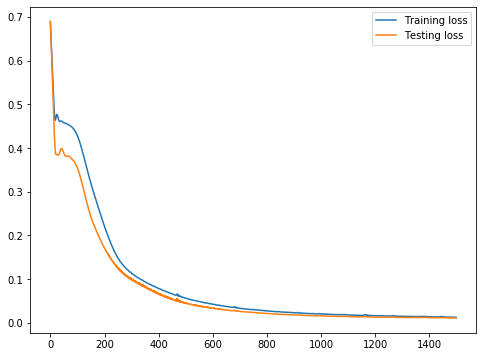

In [195]:
plt.figure(figsize=(8,6))
plt.plot(Train_loss, label='Training loss')
plt.plot(Test_loss, label='Testing loss')
plt.legend()
plt.show()

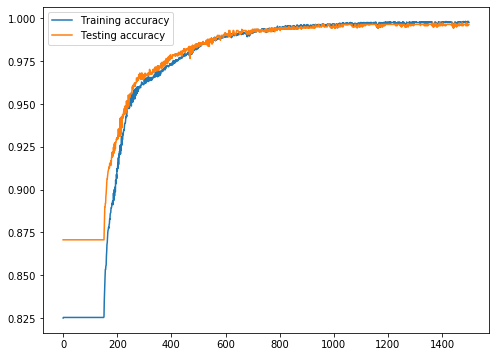

In [196]:
plt.figure(figsize=(8,6))
plt.plot(Train_acc, label='Training accuracy')
plt.plot(Test_acc, label='Testing accuracy')
plt.legend()
plt.show()

In [197]:
MODEL_PATH = 'model/model.pth'
torch.save(net, MODEL_PATH)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/torch/serialization.py:360: UserWarning: Couldn't retrieve source code for container of type Net. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [198]:
net = torch.load(MODEL_PATH)

In [199]:

classes = ['Hazardous', 'Non-hazardous']
y_pred = net(X_test_t)
y_pred = y_pred.ge(.5).view(-1)
y_test = y_test
print(classification_report(y_test_t, y_pred, target_names=classes))

               precision    recall  f1-score   support

    Hazardous       1.00      1.00      1.00      1225
Non-hazardous       0.98      0.99      0.99       182

     accuracy                           1.00      1407
    macro avg       0.99      0.99      0.99      1407
 weighted avg       1.00      1.00      1.00      1407



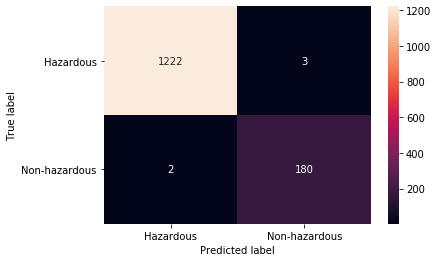

In [200]:
plt.figure(figsize=(6,4))
cm = confusion_matrix(y_test_t, y_pred)
df_cm = pd.DataFrame(cm, index=classes, columns=classes)
hmap = sns.heatmap(df_cm, annot=True, fmt="d")
hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=0, ha='center')
bottom, top = hmap.get_ylim()
hmap.set_ylim(bottom + 0.5, top - 0.5)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()